In [47]:
import numpy as npy
import matplotlib.pyplot as plt
import seaborn as sns



size_gen = 100
m=0
b=0


sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

def generar_listado_a():
    return list(npy.random.randint(low = 5,high=100,size=size_gen))

def generar_listado_b():
    #return list(npy.random.poisson(800, size_gen))
    return npy.random.normal(300, 100.5, size=(100))

def generar_listado_c():
    return list(npy.random.poisson(600, size_gen))


def generar_listado_y_hat(data_z):
    data_ex=[]
    for n in data_z:     
        data_ex.append(n*m+b)              
    return data_ex
     
def generar_listado_error(data_t,data_r):
    error=[]
    for n in range(size_gen):         
        error.append(((data_r[n]-data_t[n])**2)/2)            
    return error


def generar_listado_gradiente_m(data_x,data_w,data_q):
    gradiente_xc=[]
    for n in range(size_gen):         
        gradiente_xc.append((data_q[n]-data_w[n])*data_x[n])            
    return gradiente_xc

def generar_listado_gradiente_b(data_f,data_g):
    gradiente_xz=[]
    for n in range(size_gen):         
        gradiente_xz.append((data_g[n]-data_f[n]))            
    return gradiente_xz     


def genera_listado():
    function_A=[]  

    
    npy.save('A', npy.array(generar_listado_a()))
    npy.save('B', npy.array(generar_listado_b()))
 
    data_a=npy.load('A.npy')
    data_b=npy.load('B.npy')

    sns.scatterplot(data_a, data_b)

    
    
    data_y=generar_listado_y_hat(data_a)

     
    error_promedio = npy.mean(generar_listado_error(data_b,data_y))
    
    gradiente_m = generar_listado_gradiente_m(data_a,data_b,data_y)
    gradiente_b = generar_listado_gradiente_b(data_b,data_y)

    
    gb_prom=npy.mean(gradiente_b)
    gm_prom=npy.mean(gradiente_m)


    for x in range(10): 
        x*gm_prom+gb_prom
        function_A.append(x*gm_prom+gb_prom)
        
    import matplotlib.pyplot as plt_t

    print(function_A)
    plt_t.plot(function_A)    
    plt_t.show()

    return(function_A)

def operar_listado_doble():
  A_function=[]  
  function_B=[] 
  
  npy.save('A', npy.array(generar_listado_a()))
  npy.save('B', npy.array(generar_listado_b()))
  
  npy.save('C', npy.array(generar_listado_a()))
  npy.save('D', npy.array(generar_listado_c()))
  
  data_a=npy.load('A.npy')
  data_b=npy.load('B.npy')
  
  data_c=npy.load('C.npy')
  data_d=npy.load('D.npy')
   
  sns.scatterplot(data_a, data_b)
  sns.scatterplot(data_c, data_d)
  
  
  data_y=generar_listado_y_hat(data_a)
  data_y_c=generar_listado_y_hat(data_c)
  
  generar_listado_error(data_b,data_y) 
  generar_listado_error(data_d,data_y_c) 
 
    
  error_promedio_a = npy.mean(generar_listado_error(data_b,data_y)) 
  error_promedio_b = npy.mean(generar_listado_error(data_d,data_y_c)) 
    
  print('Error_promedio_A:',error_promedio_a)  
  print('Error_promedio_B:',error_promedio_b)  
  
  gradiente_m = generar_listado_gradiente_m(data_a,data_b,data_y)
  gradiente_b = generar_listado_gradiente_b(data_b,data_y)
  
  
  gradiente_mi = generar_listado_gradiente_m(data_c,data_d,data_y_c)
  gradiente_bi = generar_listado_gradiente_b(data_d,data_y_c)
  
  
  gb_prom=npy.mean(gradiente_b)
  gm_prom=npy.mean(gradiente_m)
  
  gb_prom_c=npy.mean(gradiente_bi)
  gm_prom_c=npy.mean(gradiente_mi)

  for x in range(10): 
      A_function.append(x*gm_prom+gb_prom)
  print('---------------------------')    
  for x in range(10): 
      function_B.append(x*gm_prom_c+gb_prom_c)      
      
  from sklearn.metrics import mean_absolute_percentage_error   
  
  mean_absolute_percentage_error(A_function, function_B)
    
  #plt.plot(function)   
  print(A_function)
  print(function_B)
  return mean_absolute_percentage_error(A_function, function_B)


Error_promedio_A: 48046.207794198606
Error_promedio_B: 180456.86
---------------------------
[-292.4334855044764, -15142.457684598952, -29992.48188369343, -44842.506082787906, -59692.530281882384, -74542.55448097685, -89392.57868007132, -104242.6028791658, -119092.62707826028, -133942.65127735474]
[-600.28, -31139.739999999998, -61679.2, -92218.66, -122758.12, -153297.58, -183837.04, -214376.5, -244915.96, -275455.42000000004]
1.0561229022491287


C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


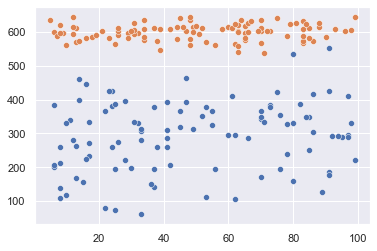

In [48]:
print(operar_listado_doble())

[-306.3351378283611, -15383.770357819929, -30461.2055778115, -45538.64079780307, -60616.076017794636, -75693.5112377862, -90770.94645777777, -105848.38167776933, -120925.8168977609, -136003.25211775248]


C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


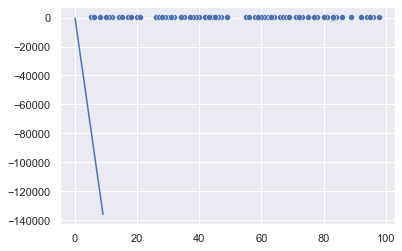

[-306.2128406668748, -16562.387837576003, -32818.562834485136, -49074.73783139426, -65330.91282830339, -81587.08782521253, -97843.26282212164, -114099.43781903078, -130355.61281593991, -146611.78781284904]


C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


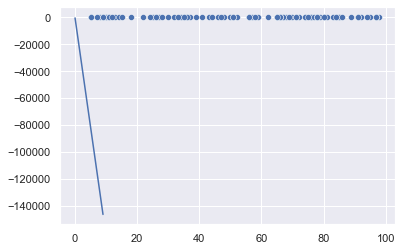

[-297.90543741533867, -16938.332266676938, -33578.75909593854, -50219.18592520014, -66859.61275446173, -83500.03958372334, -100140.46641298493, -116780.89324224653, -133421.32007150815, -150061.74690076974]


C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


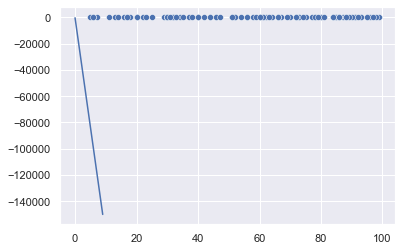

[-284.09142023522037, -14622.672002770985, -28961.252585306753, -43299.83316784252, -57638.413750378284, -71976.99433291404, -86315.5749154498, -100654.15549798557, -114992.73608052134, -129331.3166630571]


C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


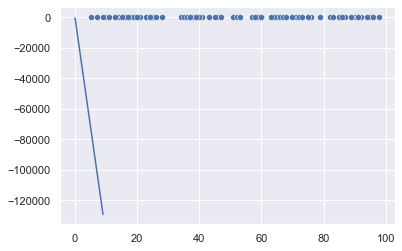

In [49]:
A= genera_listado()
B= genera_listado()
C= genera_listado()
D= genera_listado()